In [22]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
predict_price = pd.read_csv('kc_house_data.csv')
predict_price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [24]:
predict_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [25]:
predict_price.drop(['date','id'], axis = 1, inplace = True )

In [26]:
predict_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [27]:
predict_price.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [28]:
corr_features = predict_price.corr().loc['price']
corr_features

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

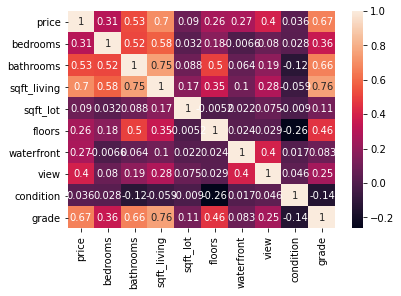

In [29]:
df_small = predict_price.iloc[:,:10]
corr_mat = df_small.corr()

sns.heatmap(corr_mat, annot = True)
plt.show()

<AxesSubplot:>

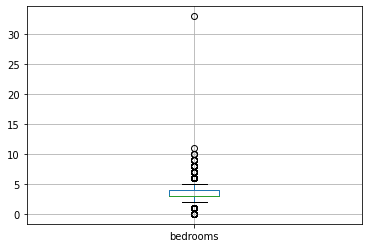

In [30]:
# en stor outlier.
predict_price.boxplot(column ='bedrooms')

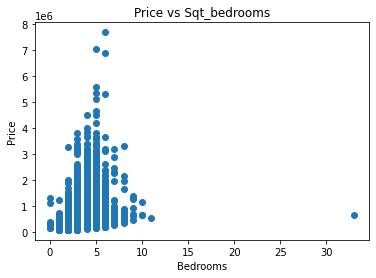

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(predict_price.bedrooms, predict_price.price)
plt.title('Price vs Sqt_bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()
sns.despine()

In [11]:
# ett house med 33 bedrooms, är en outlier
predict_price.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
# tagit bort outliern med 33 bedrooms
predict_price = predict_price[predict_price['bedrooms']!=33]

In [13]:
# kollar om den är borta
predict_price.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

Text(0, 0.5, 'price')

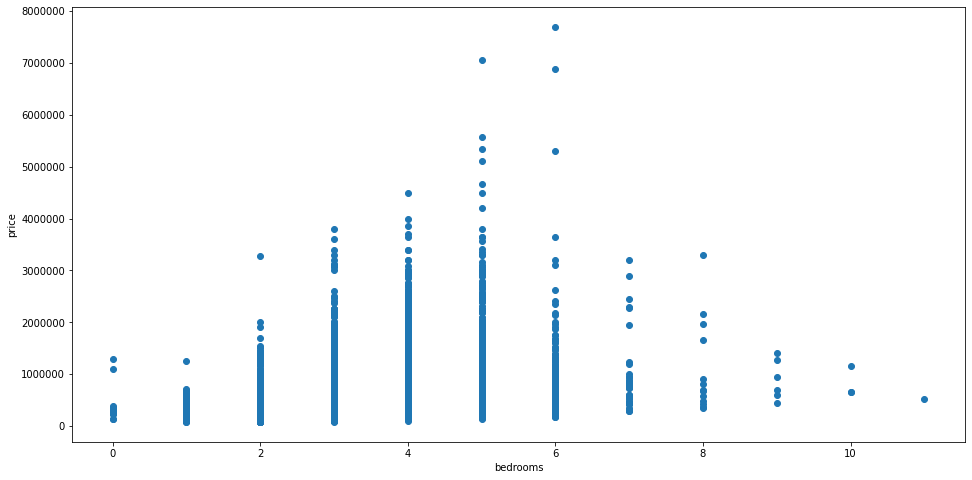

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.ticklabel_format(style='plain')
ax.scatter(predict_price['bedrooms'], predict_price['price'])
ax.set_xlabel('bedrooms')
ax.set_ylabel('price')

#### Let us see , If price is getting affecting by living area of the house or not ?

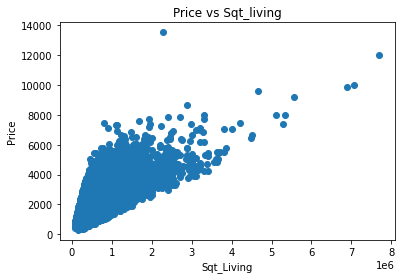

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(predict_price.price, predict_price.sqft_living)
plt.title('Price vs Sqt_living')
plt.xlabel('Sqt_Living')
plt.ylabel('Price')
plt.show()
sns.despine()

#### Now , let us see , If price is getting affecting by bathrooms of the house or not ?

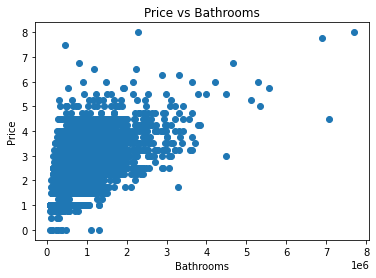

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(predict_price.price, predict_price.bathrooms)
plt.title('Price vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()
sns.despine()

In [17]:
top_corr = predict_price.corr().loc['price'].apply(np.abs).sort_values(ascending = False).index[1:10]
top_corr = list(top_corr)
top_corr

['sqft_living',
 'grade',
 'sqft_above',
 'sqft_living15',
 'bathrooms',
 'view',
 'sqft_basement',
 'bedrooms',
 'lat']

In [18]:
#ta bort en value, från listan 'lat'
top_corr.remove('lat')

In [19]:
top_corr

['sqft_living',
 'grade',
 'sqft_above',
 'sqft_living15',
 'bathrooms',
 'view',
 'sqft_basement',
 'bedrooms']

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


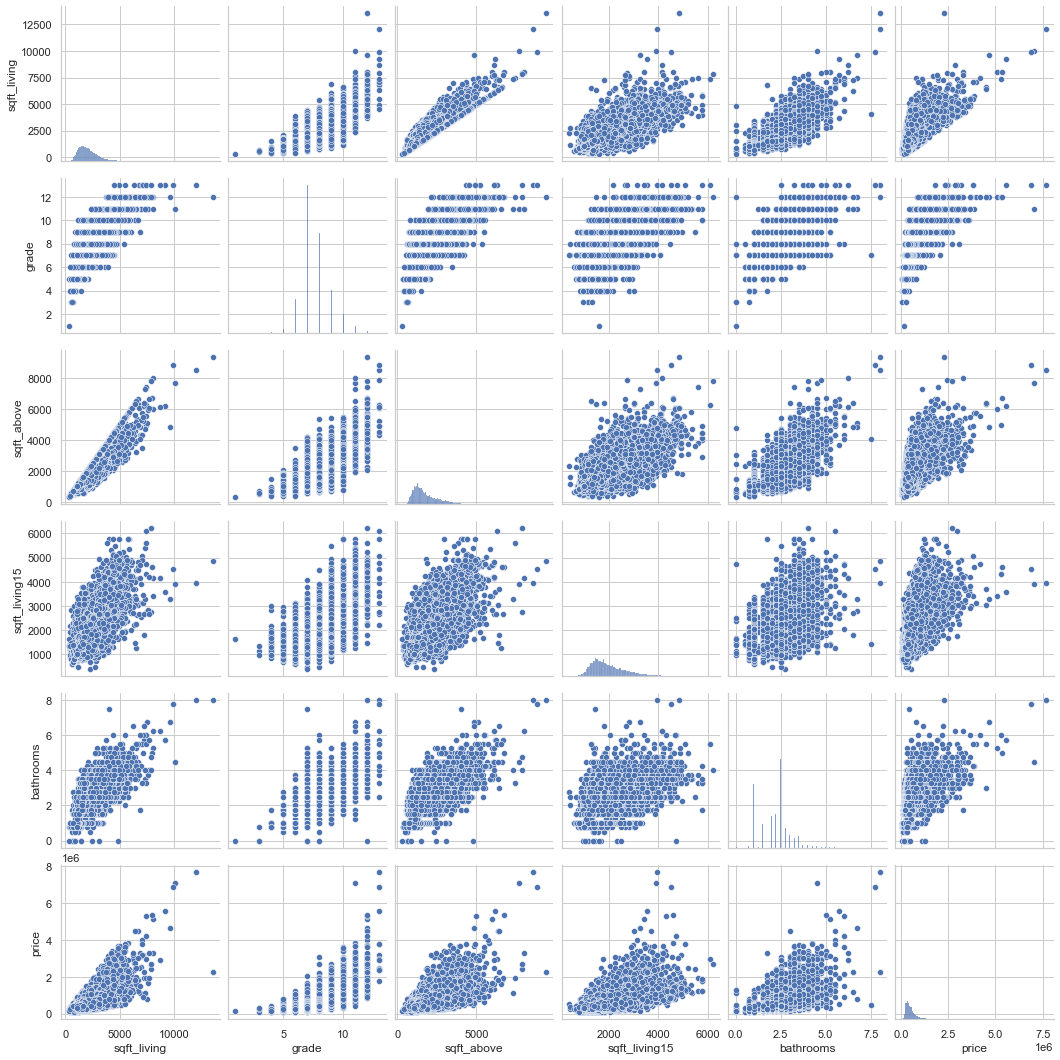

In [31]:
sns.set(style='whitegrid',context='notebook')
cols=['sqft_living','grade','sqft_above','sqft_living15', 'bathrooms', 'price']
sns.pairplot(predict_price[cols],size=2.5)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [22]:
target = 'price'
robust_scaler = RobustScaler()
x = predict_price[top_corr]
x = robust_scaler.fit_transform(x)
y = predict_price[target]
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2, random_state = 123)

In [23]:
#skapar en tom modell
model = pd.DataFrame(index =['top_fea_mse','top_fea_rmse', 'full_model_mse', 'full_model_rmse'], columns = ['NULL','MLR', 'KNN', 'LASSO'])

In [24]:
y_null_model = y_train.mean()
model.loc['top_fea_mse', 'NULL'] = mean_squared_error(y_pred =np.repeat(y_null_model, y_test.size), y_true = y_test)
model.loc['top_fea_rmse', 'NULL'] = mean_squared_error(y_pred =np.repeat(y_null_model, y_test.size), y_true = y_test,squared = False)

# A Multi Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

model.loc['top_fea_mse','MLR'] = mean_squared_error(y_pred = lin_reg.predict(x_test), y_true = y_test)
model.loc['top_fea_rmse', 'MLR'] = mean_squared_error(y_pred = lin_reg.predict(x_test), y_true = y_test,squared = False)


# B KNN 

In [26]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10, weights = 'distance', metric = 'euclidean')
knn.fit(x_train, y_train)

model.loc['top_fea_mse', 'KNN'] = mean_squared_error(y_pred = knn.predict(x_test), y_true = y_test ) 
model.loc['top_fea_rmse', 'KNN'] = mean_squared_error(y_pred = knn.predict(x_test), y_true = y_test, squared = False ) 

# Lasso

In [27]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.0001)

lasso.fit(x_train, y_train)

model.loc['top_fea_mse', 'LASSO'] = mean_squared_error(y_pred = lasso.predict(x_test), y_true = y_test)
model.loc['top_fea_rmse', 'LASSO'] = mean_squared_error(y_pred = lasso.predict(x_test), y_true = y_test, squared=False)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68659715107719.125, tolerance: 238988908276.44565
  model = cd_fast.enet_coordinate_descent(


In [28]:
model

,NULL,MLR,KNN,LASSO
top_fea_mse,1.21008e+11,4.97979e+10,4.47943e+10,4.97979e+10
top_fea_rmse,347862,223154,211647,223154
full_model_mse,NaN,NaN,NaN,NaN
full_model_rmse,NaN,NaN,NaN,NaN


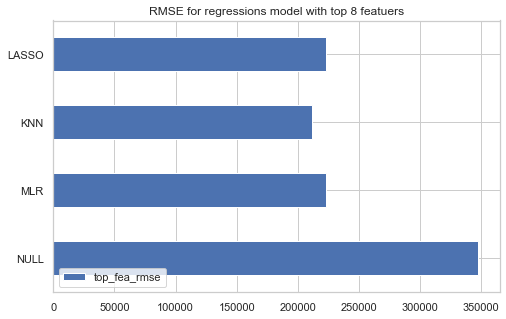

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
model.loc['top_fea_rmse'].plot(kind = 'barh', ax = ax)
ax.set_title('RMSE for regressions model with top 8 featuers')
ax.legend(loc = 3)

# Using all the features

In [31]:
target_name = 'price'
x = predict_price.drop('price',axis = 1)
x = robust_scaler.fit_transform(x)
y = predict_price[target_name]
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2, random_state = 124)


In [32]:
y_null_model = y_train.mean()
model.loc['full_model_mse', 'NULL'] = mean_squared_error(y_pred =np.repeat(y_null_model, y_test.size), y_true = y_test)
model.loc['full_model_rmse', 'NULL'] = mean_squared_error(y_pred =np.repeat(y_null_model, y_test.size), y_true = y_test,squared = False)

### A. Multiple Linear Regressn

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

model.loc['full_model_mse','MLR'] = mean_squared_error(y_pred = lin_reg.predict(x_test), y_true = y_test)
model.loc['full_model_rmse', 'MLR'] = mean_squared_error(y_pred = lin_reg.predict(x_test), y_true = y_test, squared=False)

## B. KNN

In [34]:
knn = KNeighborsRegressor(n_neighbors = 10, weights = 'distance', metric = 'euclidean')
knn.fit(x_train, y_train)

model.loc['full_model_mse', 'KNN'] = mean_squared_error(y_pred = knn.predict(x_test), y_true = y_test ) 
model.loc['full_model_rmse', 'KNN'] = mean_squared_error(y_pred = knn.predict(x_test), y_true = y_test, squared= False ) 

In [35]:
lasso = Lasso(alpha = 0.0001)

lasso.fit(x_train, y_train)

model.loc['full_model_mse', 'LASSO'] = mean_squared_error(y_pred = lasso.predict(x_test), y_true = y_test)
model.loc['full_model_rmse', 'LASSO'] = mean_squared_error(y_pred = lasso.predict(x_test), y_true = y_test, squared=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149468865452922.56, tolerance: 229851758226.7119
  model = cd_fast.enet_coordinate_descent(


In [36]:
model

,NULL,MLR,KNN,LASSO
top_fea_mse,1.21008e+11,4.97979e+10,4.47943e+10,4.97979e+10
top_fea_rmse,347862,223154,211647,223154
full_model_mse,1.42127e+11,4.41547e+10,3.51027e+10,4.41547e+10
full_model_rmse,376998,210130,187357,210130


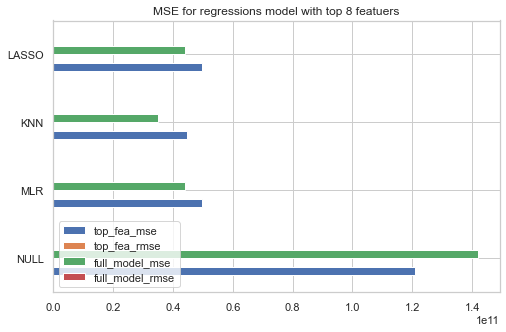

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
model.T.plot(kind='barh', ax=ax)
ax.set_title('MSE for regressions model with top 8 featuers')
ax.legend(loc = 3)